### Postać rozwiązania

Nasze rozwiązanie będzie miało postać wektorów wierzchołków grafu ułożonych w kolejności odwiedzania przypisanych do poszczególnych dronów:<br>

<center>
$d_{1}=(1,3,5...)$<br>
$d_{2}=(2,7,9...)$<br>
&emsp;&emsp;.<br>
&emsp;&emsp;.<br>
&emsp;&emsp;.<br>
$d_{M}=(10,15,4...)$<br>
   </center>
M - ilość wymaganych dronów

### Funkcja celu

\begin{equation*}
F=min (\sum \limits _{v=1} ^{M} \sum \limits _{i=0} ^{N} \sum \limits _{j=0} ^{N} c_{ij} x_{vij} + \alpha (M-D))
\end{equation*}

gdzie:
<ul>
    <li>$M$ – liczba dronów
    <li>$N$ – liczba odbiorców
    <li>$c_{ij}$ – koszt(czas) przejazdu od odbiorcy $i$ do odbiorcy $j$
    <li>$x_vij$ – zmienna decyzyjna która określa czy dron $v$ wykonuje trase od $i$ do $j$
    <li>$x_{vij} = \left\{
            \begin{array}{ll}
                1 & \mbox{gdy realizowany jest kurs od i do j przez drona v}\\
                0 & \mbox{w przeciwnym przypadku}
            \end{array}
        \right. 
        $
    <li>$\alpha$ – Współczynnik kary
    <li>$D$ – Liczba dronów w posiadaniu 
</ul>                  

### Ograniczenia
Jeśli $ x_{vij} = 1 \Rightarrow  u_{i} + q_{vj} = u_{j}$</br>

<center>$ q_{vi} \leq u_{i} \leq Q \quad \forall_{i} \in_{1, 2,..., N} $</center>

<!-- \begin{equation*}
\sum \limits _{v=1} ^{M} \sum \limits _{i=0} ^{N} y_{iv} \leq Q
\end{equation*}
\begin{equation*}
\sum \limits _{i=0} ^{N} y_{iv} \leq Q \quad }
\end{equation*}
 -->
$ q_{vi} $ – wielkość zapotrzebowania dostarczana do $i$-tego klienta przez $v$-tego drona

$Q $ – ładowność drona


### Struktury danych potrzebnych do algorytmu

> Macierz dystansów od poszczególnych odbiorców

\begin{equation*}
M_{i,j} = 
\begin{pmatrix}
d_{1,1} & d_{1,2} & \cdots & d_{1,n} \\
d_{2,1} & d_{2,2} & \cdots & d_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
d_{i,1} & d_{i,2} & \cdots & d_{i,j} 
\end{pmatrix}
\end{equation*}

gdzie:
<ul>
    <li>$i, j$ - identyfikatory poszczególnych odbiorców</li>
    <li>$d_{i,j}$ - dystans pomiędzy odbiorcami $i, j$</li>
    <li>dystans - odległość euklidesowa $d_{i,j} = \sqrt{(x_{i}-x_{j})^{2}+(y_{i}-y_{j})^{2}}$
</ul>

> Lista położenia poszczególnych odbiorców

<center>$ L_{i} = a_{1}, a_{2},... a_{i} $</center>

gdzie:
<ul>
    <li>$a_{i}$ - koordynaty $i - tego$ odbiorcy $(x_{i}, y_{i})$</li>
</ul>


> Ilość dronów - M

> Ładowność drona - Q

> Ilość odbiorców - N




In [1]:
from tabu_search import TabuSearch
from visualization import WithVisualization
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Testing

history = []
avgs = {}
costs_history = []
best_costs_history = []
best_TS = None

best_of_all = 99999

t_l = [i*10 for i in range(5, 8)]

for l in t_l:
    for i in range(2):
        _ts = TabuSearch(7, 4, 28, "clients2.txt")
        _ts.search(tabu_size=l, n_iters=4000)
        fit = _ts._fitness(_ts.best_solution)
        print(f'Tabu size: {l}, Best_cost: {fit}')
        history.append(fit)
        costs_history.append(_ts.costs)
        best_costs_history.append(_ts.best_costs)
        if fit < best_of_all:
            best_of_all = fit
            best_TS = _ts
    h = np.array(history)
    avgs[l] = h.mean()
    history = []
    print('=========================')
    print(f'Average: {avgs[l]}')
    print(f'Best: {h.min()}\n')

Elapsed time 3.0015461444854736 s
Tabu size: 50, Best_cost: 431.1004238986193
Elapsed time 3.0250279903411865 s
Tabu size: 50, Best_cost: 437.16834624647066
Average: 434.134385072545
Best: 431.1004238986193

Elapsed time 2.9973483085632324 s
Tabu size: 60, Best_cost: 437.16834624647066
Elapsed time 2.9333229064941406 s
Tabu size: 60, Best_cost: 431.10042389861934
Average: 434.134385072545
Best: 431.10042389861934

Elapsed time 2.9834671020507812 s
Tabu size: 70, Best_cost: 431.1004238986193
Elapsed time 2.992715358734131 s
Tabu size: 70, Best_cost: 437.16834624647066
Average: 434.134385072545
Best: 431.1004238986193



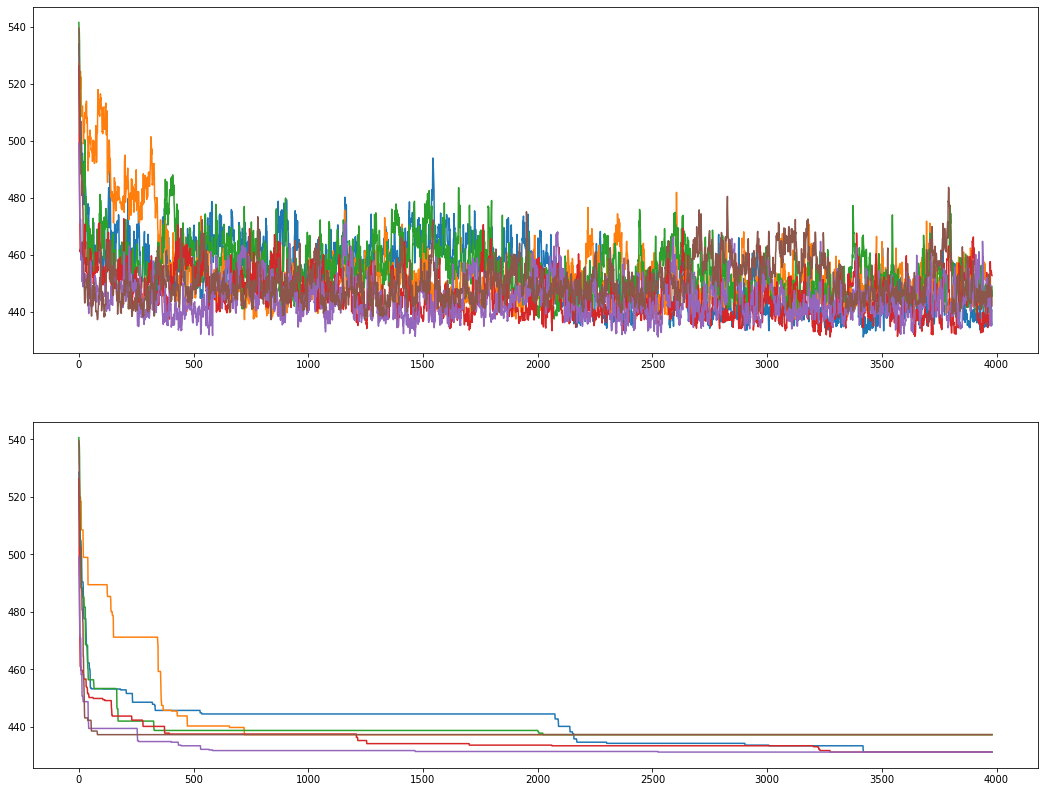

In [3]:
# Plot cost function history
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 14))
for c, b in zip(costs_history, best_costs_history):
    ax1.plot(c[20:])
    ax2.plot(b[20:])
plt.show()

In [4]:
# Need for figure outside jupyter
# %matplotlib qt
# %matplotlib inline
# %matplotlib notebook

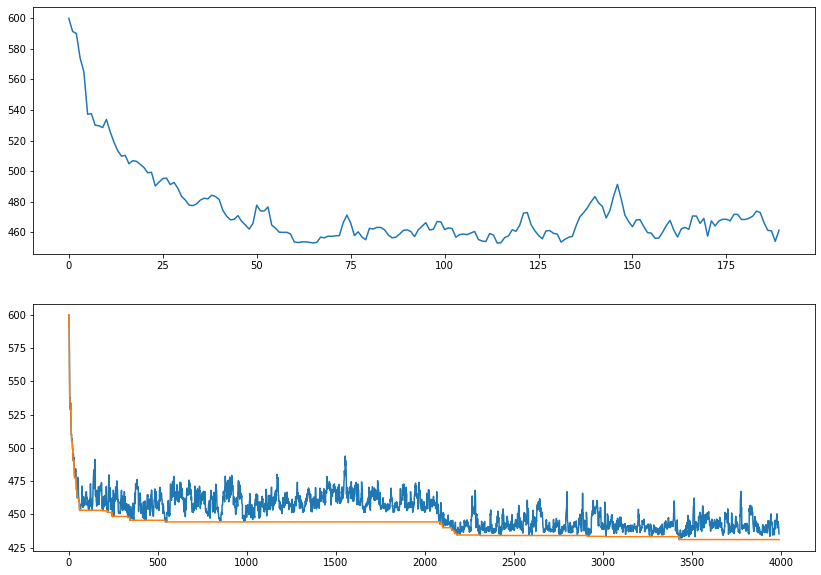

In [5]:
# Plot best solution cost history
plt.figure(figsize=(14,10))
plt.subplot(211)
plt.plot(best_TS.costs[10:200])
plt.subplot(212)
plt.plot(best_TS.costs[10:])
plt.plot(best_TS.best_costs[10:])

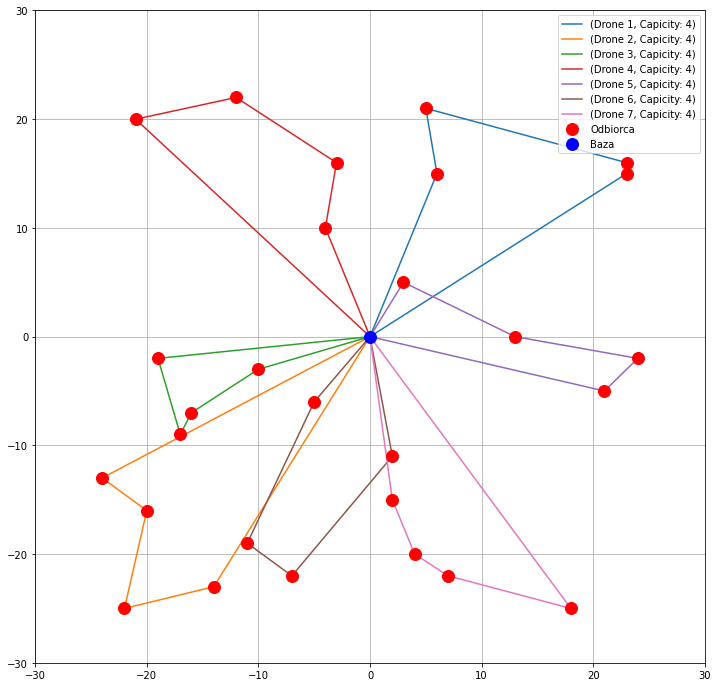

In [6]:
vis3 = WithVisualization(best_TS)
vis3.plot_figure()
vis3.plot_solution()

In [6]:
np.set_printoptions(threshold=np.inf)
# ts3.distance_matrix

In [7]:
# best =\
# {0: [0, 22, 18, 19, 24], 1: [0, 11, 28, 20, 17], 2: [0, 12, 6, 5, 1], 3: [0, 7, 9, 14, 26], 4: [0, 2, 27, 3, 10], 5: [0, 8, 13, 21, 25], 6: [0, 15, 16, 4, 23]}
# best_path = {}
# for d in ts3.drones:
#     best_path[d] = [ts3.clients[v-1] for v in best[d.id-1] if v != 0]
#     best_path[d].insert(0, Client(0,0,0))
#     best_path[d].append(Client(0,0,0))

# ts3._best = best_path